In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np

from keras.layers import Dense, Activation

##Generative modeling

####Generative modeling is unsupervised learning.

* Supervised learning
  * You give the algorithm pictures of the road from a car and want to learn the steering wheel angle.

* Unsupervised learning
  *No labels involved, give it data and learn the underlying structures 




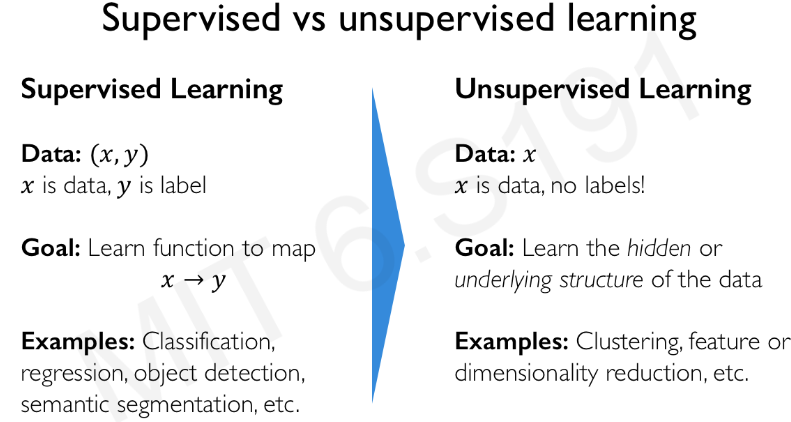

For generative modeling you take training examples from one input distribution, learn a model that represents that distribution, and once we have that model we can use it to generate brand new data.

We can do this in 2 ways:

* Densly Estimation: Can you create a density function by observing points im giving you?. If you know the underlying function, you can generate new points that match the distribution properties.

* Sample generation: You are not focused on estimating the density of this function, but you want to generate brand new samples. -Are this GAN's?



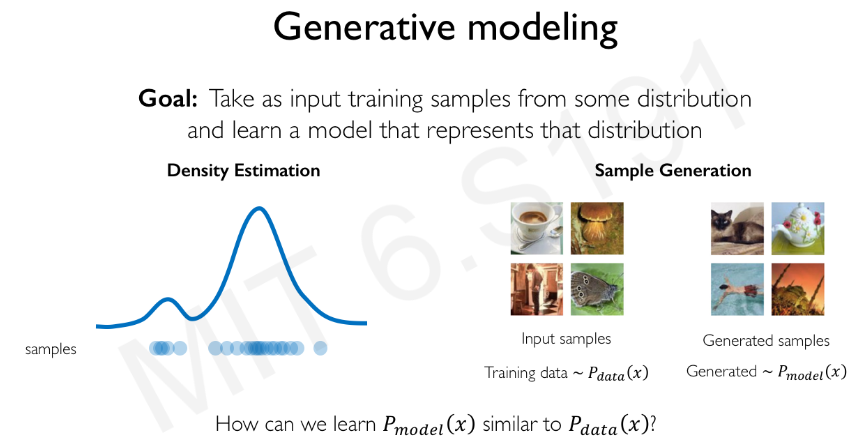

####Another great use of generative models is to detect outliers



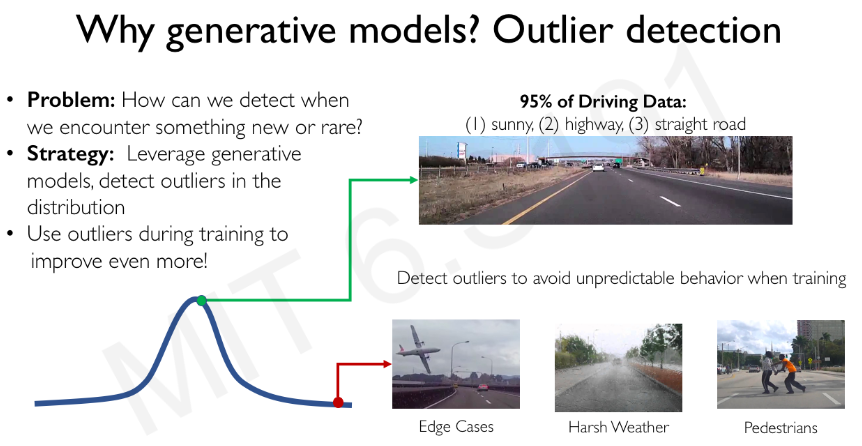

###There are two classes of models, that we call latent variable models

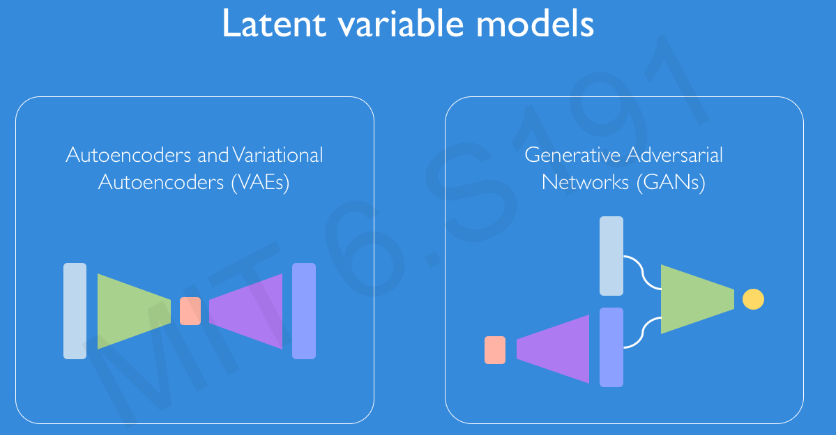

A latent variable is the true explanatory factor behind the data.

This begs the question: "Can we learn the true explanatory factors (eg. latent variables) from only observed data?


##Autoencoders

An autoencoder is a very simple generative model that tries to do this by encoding its input.

####How an autoencoder works:

1. Raw input data is fed into the model and its passed through a series of NNet layers. And what is outputed at the end of that encoding is a low-dimensional latent space - Which a feature representation we try to predict. (We call this network an encoder because its mapping the input (x) into a vector of latent variables (z).

2. We need to train (z), but we don't have the labels of (z), How do we tell the network it is training in the right direction?- We do this by building a decoder structure (NNets) that is used to deconstrunct a resemblance of the original image from this latent space. - Basically it takes (z) and maps it back to the dimensionality of the input space (x).

3. To train a network like this we use the simple formula: L(x,x') = || x-x'||^2. (we compare the output to the input)






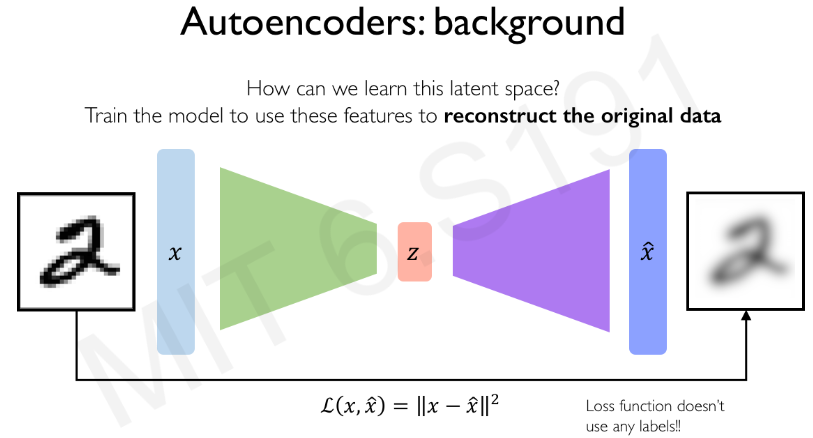

We basically quantify this latent variables we are interested in but we can't observe.

One thing that interests us in an Autoencoder is: "How do we select the dimensionality of our latent space?" - (Note: the lower the dimensionality of the latent space, the poorer the quality of the reconstruction that's generated in the end):

In the next image a network with a 2D latent space is trained vs a 5D latent space.




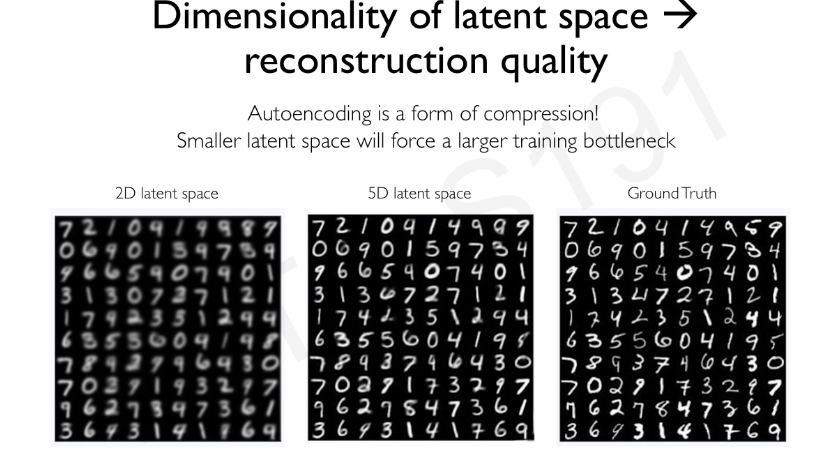

####To summarize:

1. Autoencoders use this "bottlenecking" hidden layer that forces the network to learn a compressed, latent representation of the data.

2. By using this reconstruction loss, we can train the network in a completly unsupervised manner.


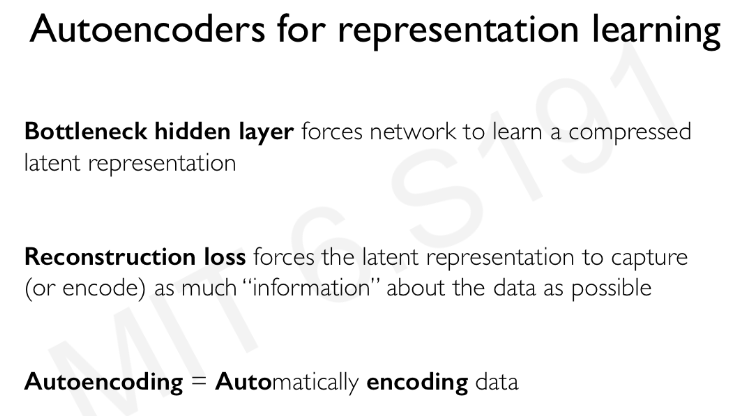

##Variational Autoencoders

Traditonal autoencoders use a deterministic encoding that allow us to reproduce the input as best as we can.

Variational Autoencoders (VAE's), are used to learn a "smoother" representation of the latent space, and use this to actually generate new images and sample new images that are similar to the input data set.

What is done is that instead of a deterministic bottleneck layer (z), we replace this with a stochastic sampling operation, that means that instead of learning this latent variables directly, for each variable we learn a mean (u) and standard deviation (o), that allows us to parametrize a probability distribution for each of this latent variables. Now we have gone from learning a vector of latent variables (z) to learning a vector of means and stdevs (which describe the probability distribution associated with this latent variables). and we can do is sample from this variables to get a probabilistic representation of our latent space.



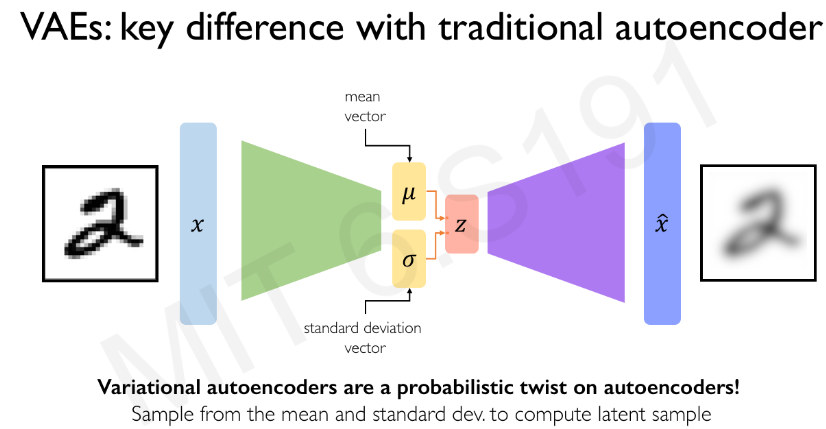

Now basically:

* The encoder: computes the probability distribution p(fi) of the latent space (z) given input (x)

* The decoder: it computes a new probability distribution q(theta) of x, given z

Now our loss function changes too. The reconstruction loss is the same as traditionals AE (How well are we constructing from the original input). The regularization term is a constrain on how the probability distribution is computed and what does that distribution resembles as a part of our network, this term also helps prevent overfitting.





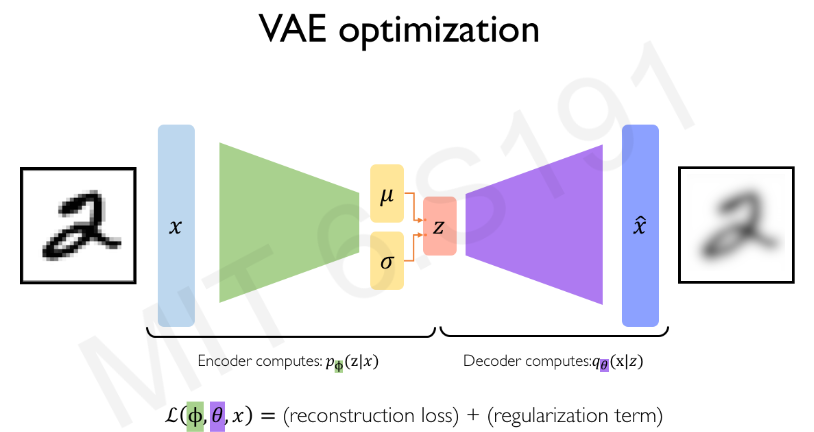

The term in the image below is the regularization term: `D(P(fi)(z|x) || p(z))` In this to use `p(z)` a common choice is a simple gaussian (we center the distribution with a mean of zero and a stdev 1). What this enables us to do is derive properties about how well our network could do, and the encoder is encouraged to distribute the latent variables evenly around this space, and the network penalizes itself when it clusters outside this distributions (eg. when overfitting or memorizing).


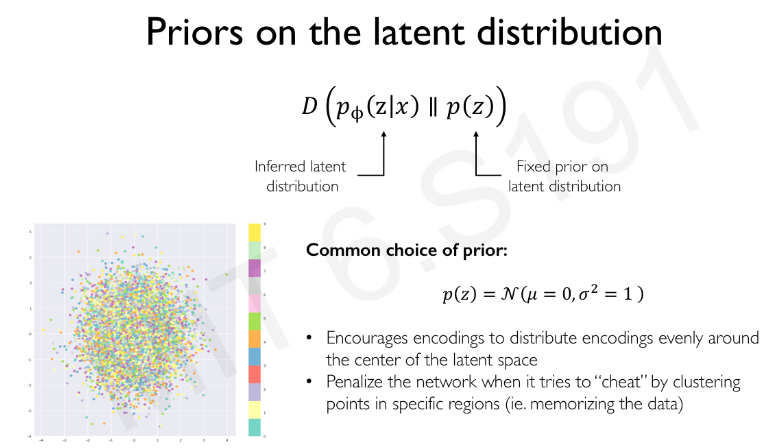

What also can be drived when we choose a normal gaussian as our prior is this distance function (KL-divergence), and this is specifically in the case when the prior distribution is a 0-1 gaussian distribution (NOTE: we choose the prior distribution according to our needs). The divergence then meassures the separation between of inferred latent distribution and this form (This before is what the KL function does)



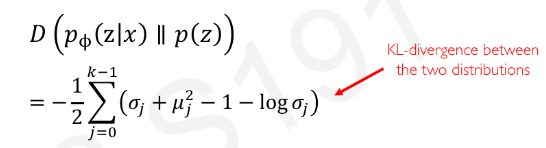

####How we can train the network
How we can actually train the network using backpropagation.

But we cannot backpropagate gradient through the sampling layer because (z)is the result of a stochastic operation and backpropagation requires deterministic nodes to be able to iteratively pass gradients and apply the change functions.

Tip: https://www.youtube.com/watch?v=Ilg3gGewQ5U (backpropagation explanation reminder + some stochastic explanation)

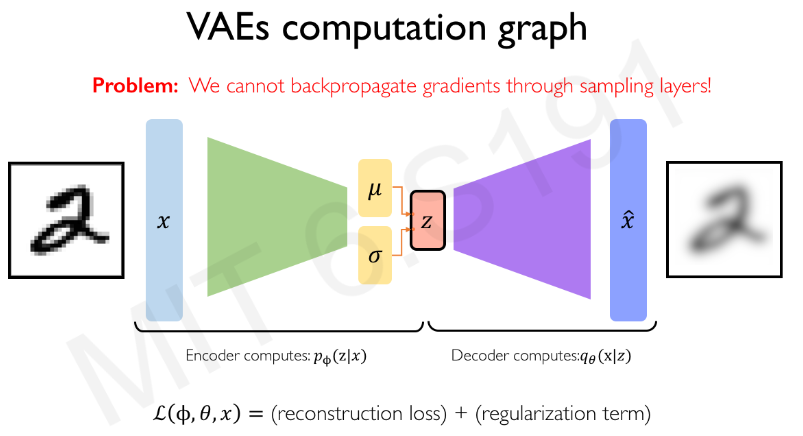

What we can do is use a reparametrization trick to reparametrize the sampling layer, such that the network can be trained end to end.

Insetad of drawing z directly from a normal distribution parametrized by (miu) and (sigma) - which does not allow us to compute gradients, intead we consider the sample latent vector (z) as a sum of a fixed vector (miu) and a fixed (sigma) vector and then scale this variance vector by a random constant that is drawn from a prior distribution.

Now that we have the reparametrization, the stochastic sampling does not occur directly in the bottleneck (z). 



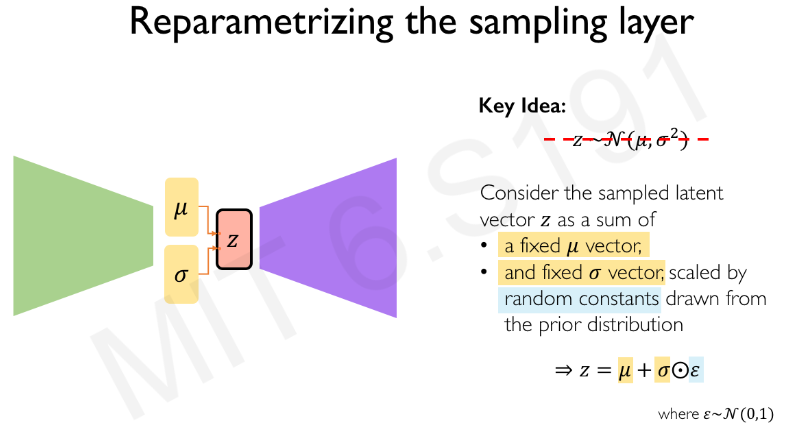

* Originally (if we were not to perform the reparametrization): we have our flow like the image below. Here our stochastic node (z) is the one we try to sample from and we cannot backpropagate.

* Reparametrized : we get a diversion of the stochastic node to the side (epsilon), and the variable (z) is now deterministic (with respect to epsilon). So we can now backpropagate through Z without running into the commplications of stochastic backpropagation and train our network.  

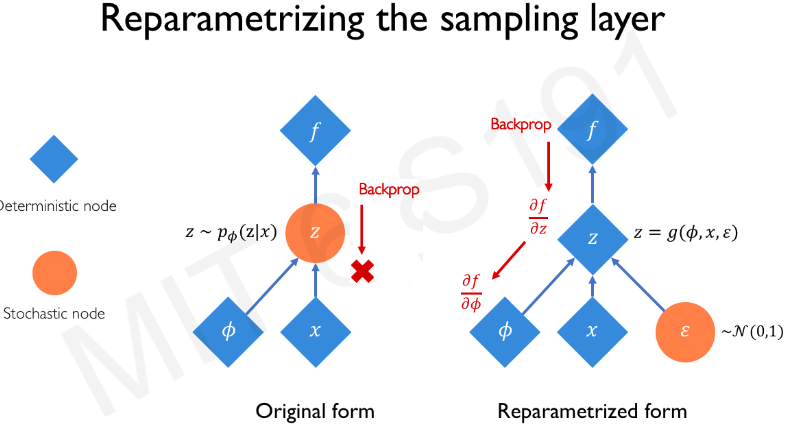

What do the latent variables actually look like and what do they mean.

In the left of the image below we are fixing all but one latent variable. This is done to slowly tune this variable, and get an interpretation of what the network is learning (you see the output and in this case, that variable is the head pose/orientation).

Because of how we are learning, we want our independent variables to be independent and uncorrelated with each other to learn the richest and most compact representation if possible.



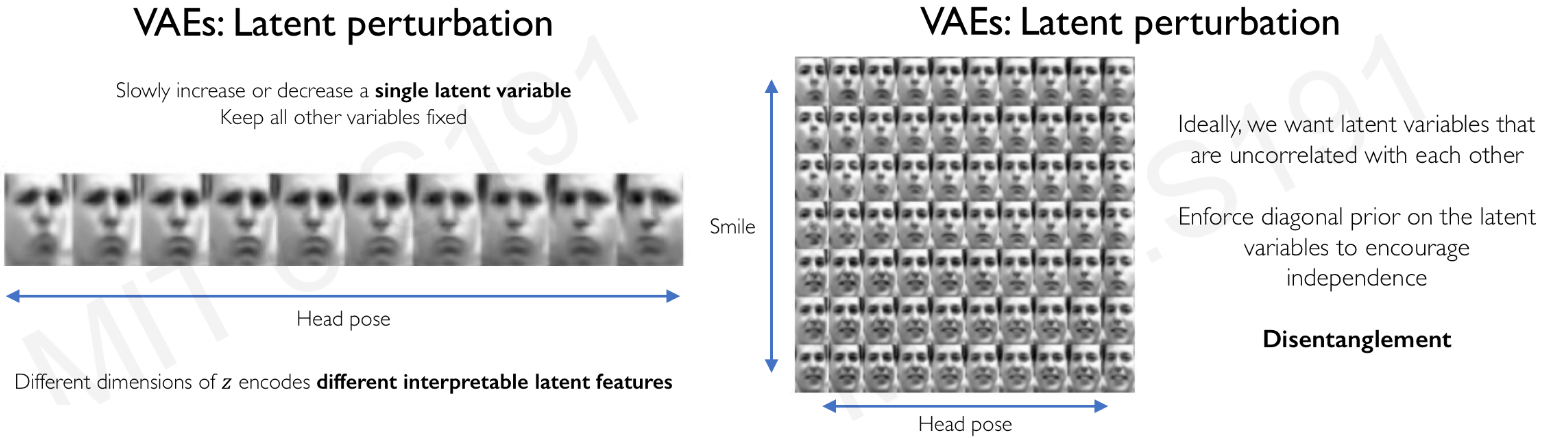

##Why generative models then.

Basically if we are given a dataset of faces, we might not know that there is a bias in the dataset (too many pictures of white people for example) and we do not want this biases.

Now if we use a generative model we can learn the latent variables of the dataset and understand which variables are overrepresented or underrepresented.



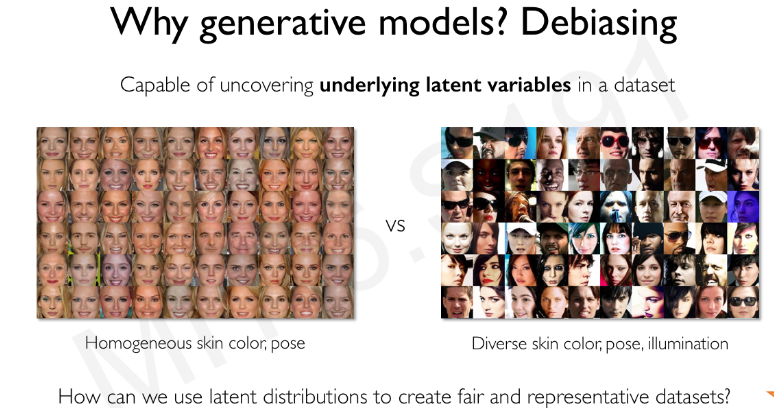

To migrate bias through learned latent structure you:

1. Learn the latent structure.
2. Estimate the distribution.
3. Adaptively resample data.
4. Learn from fair data distribution.

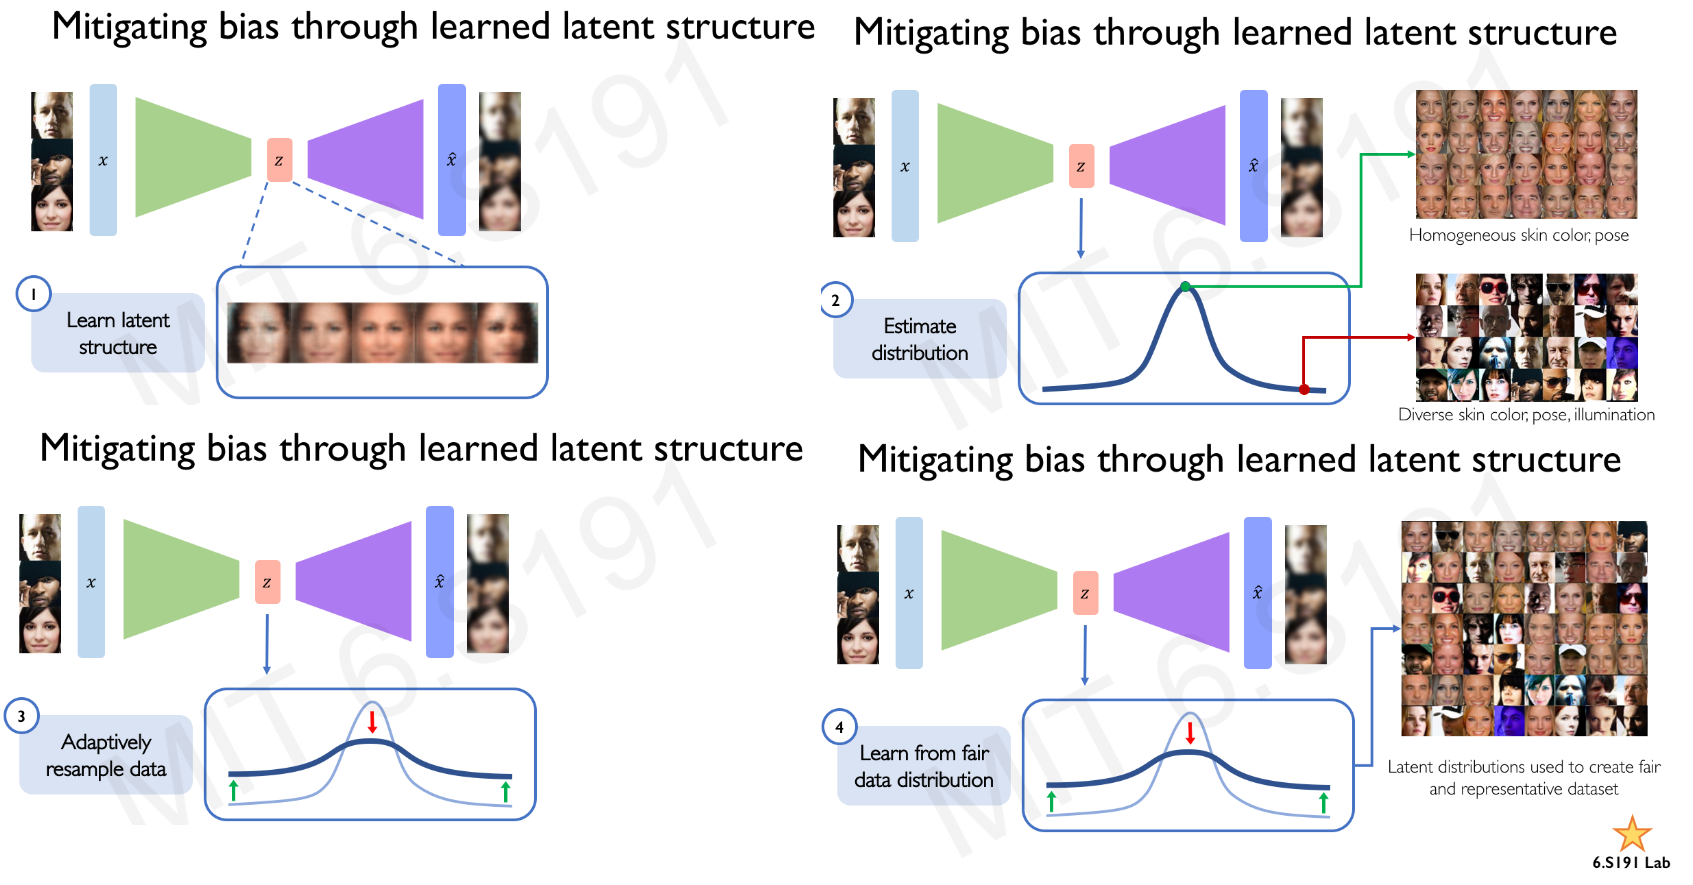

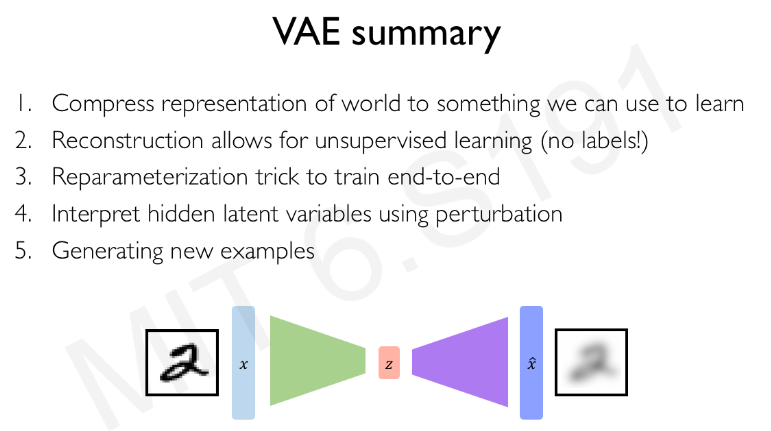

##GAN's

VAE's tackle the question of what is the probability density estimation as their core problem. 

GAN's just want to generate new samples that are as realistic as possible.

We basically have two networks competing against each other.
* Generator: Tries to create realistic examples to fool the discriminator.

* Discriminator: Tires to discenr between generated samples and real ones.



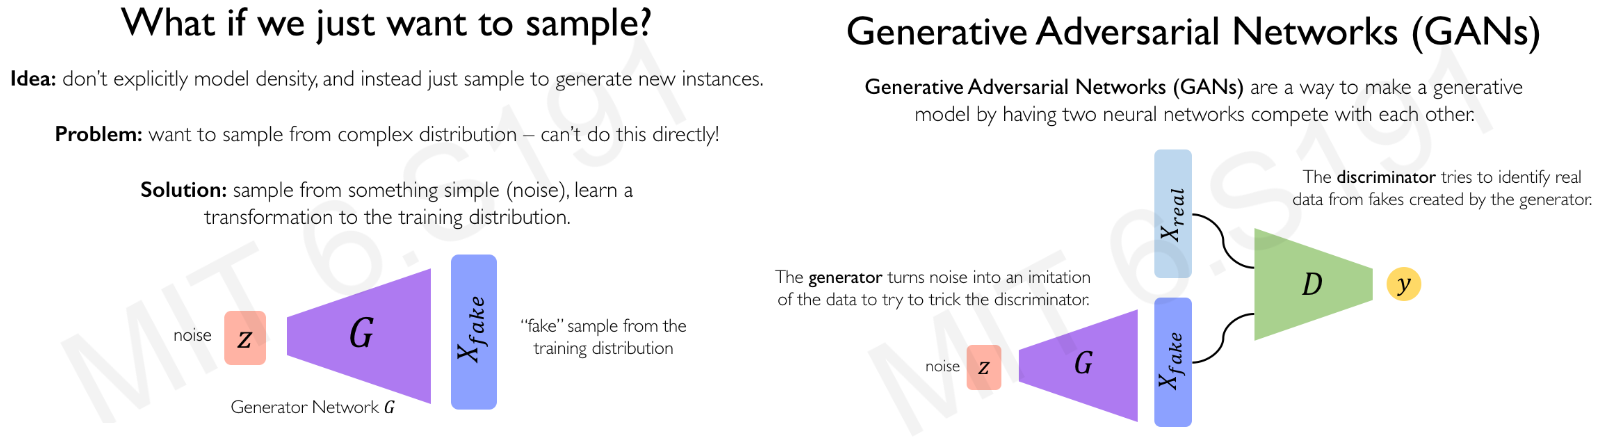

####Breaking GANs down:

1. Generator starts from noise to try to create an imitation of the data.

2. The discriminator sees the fake data and real data and tries to predict what's real and what's fake. - You train the discriminator until this can be done satisfactorily-

3. The generator comes back and sees the properties of the real data and trains itself to make its output similar to the real data.

4. Then the discriminator starts again and you go to #2, and cycle until you are satisfied with the results.

###CycleGAN: domain transormation.

You basically take some image and transform it according to certain characteristics.

(This one is the one used to transform a video (with audio) o the teacher into one of obama, or the one where you make RDJ and Tom Holland be Doc and Marty in Back2TheFuture)

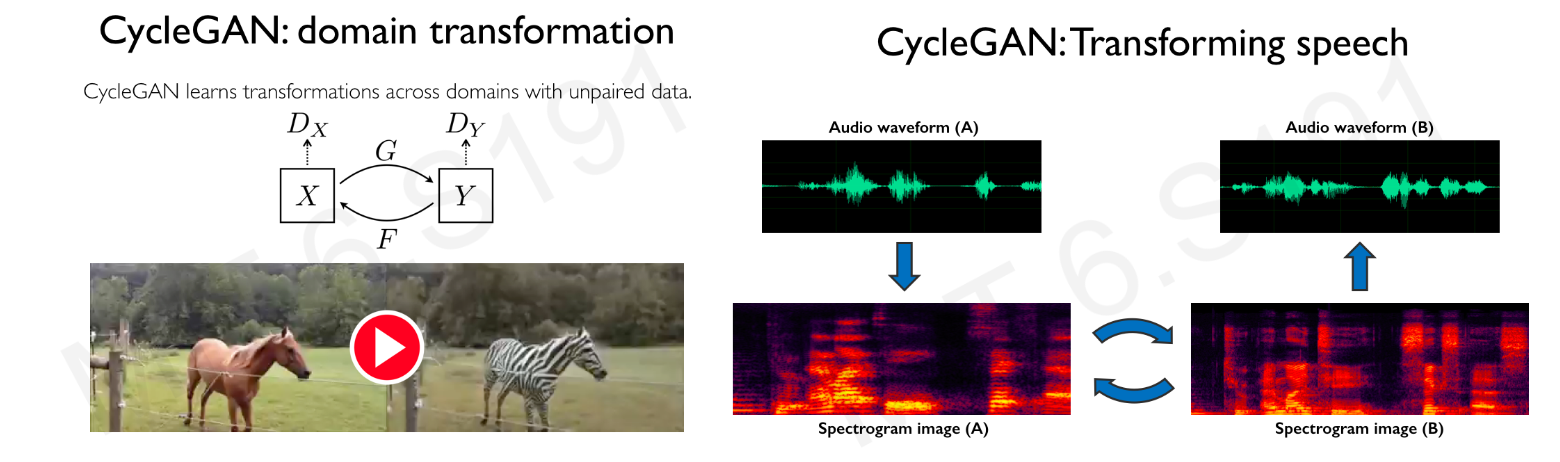

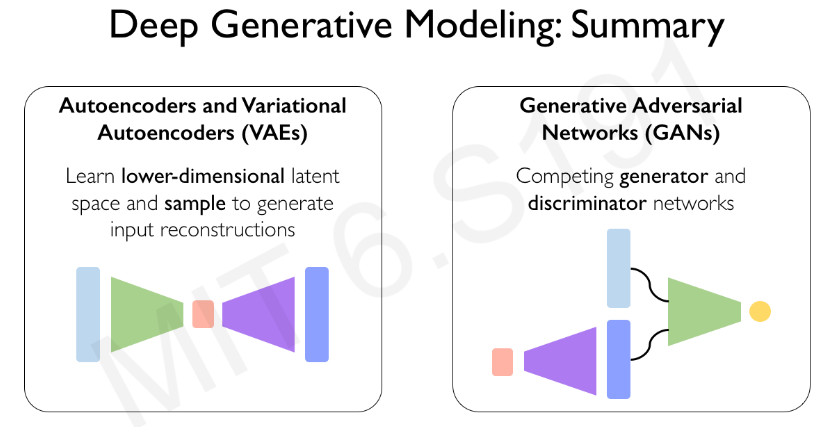

###Training GANs



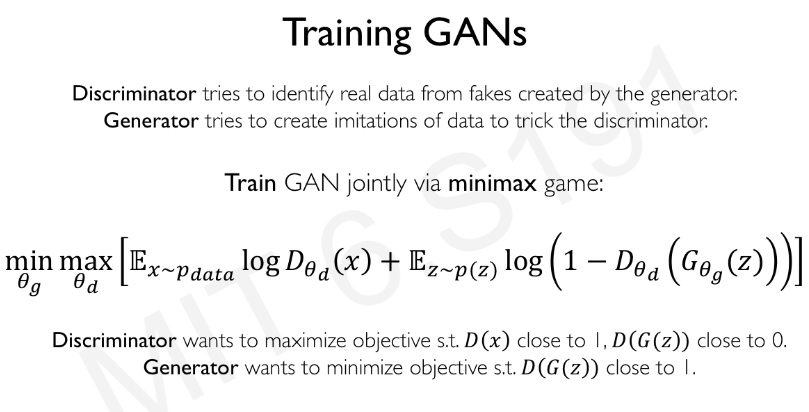